In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fraud_df = pd.read_csv('../data/raw/Fraud_Data.csv')
fraud_df.info()
fraud_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [4]:
# Before
print(f"Before dropping duplicates: {fraud_df.shape}")
fraud_df = fraud_df.drop_duplicates()
print(f"After dropping duplicates: {fraud_df.shape}")


Before dropping duplicates: (151112, 11)
After dropping duplicates: (151112, 11)


In [5]:
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
fraud_df['sex'] = fraud_df['sex'].astype('category')
fraud_df['source'] = fraud_df['source'].astype('category')
fraud_df['browser'] = fraud_df['browser'].astype('category')


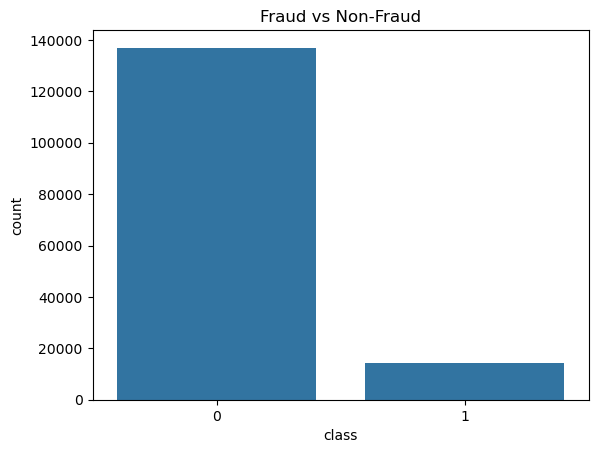

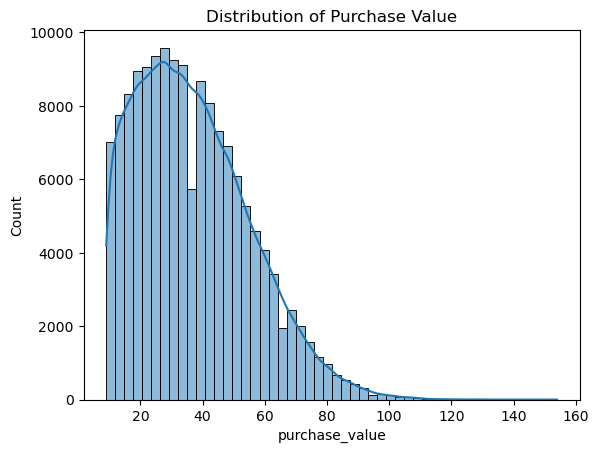

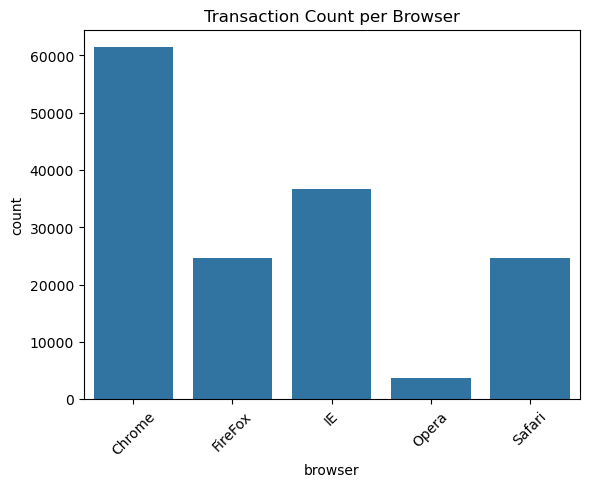

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of target variable (fraud = 1, non-fraud = 0)
sns.countplot(x='class', data=fraud_df)
plt.title('Fraud vs Non-Fraud')
plt.show()

# Distribution of purchase values
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Value')
plt.show()

# Count of each browser
sns.countplot(x='browser', data=fraud_df)
plt.title('Transaction Count per Browser')
plt.xticks(rotation=45)
plt.show()


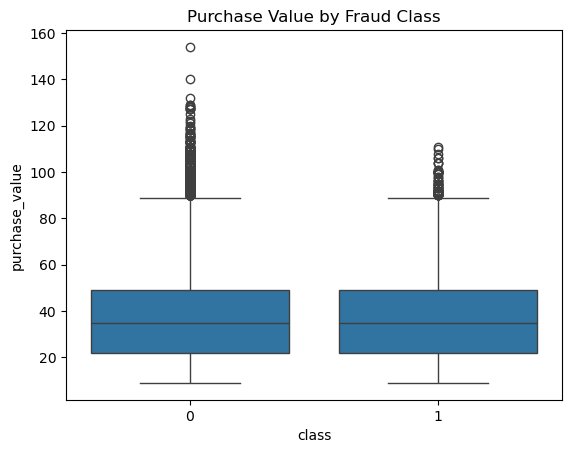

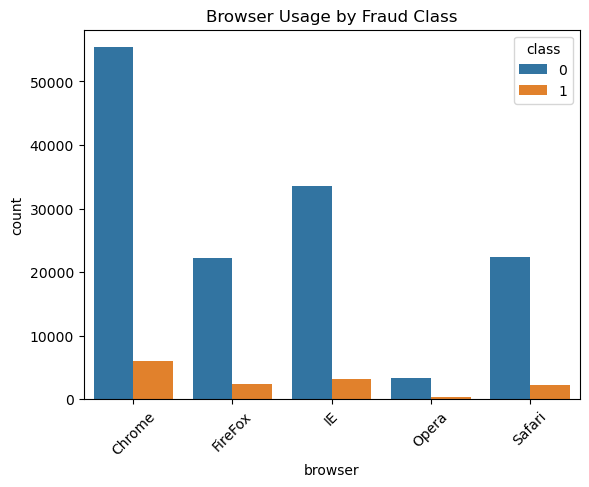

In [8]:
# Purchase value vs fraud class
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('Purchase Value by Fraud Class')
plt.show()

# Browser vs Fraud Class
sns.countplot(x='browser', hue='class', data=fraud_df)
plt.title('Browser Usage by Fraud Class')
plt.xticks(rotation=45)
plt.show()


In [10]:
import ipaddress

# Convert numeric IP (int or float) to IPv4 string
def int_to_ip(ip_num):
    try:
        return str(ipaddress.IPv4Address(int(ip_num)))
    except Exception:
        return None

fraud_df['ip_str'] = fraud_df['ip_address'].apply(int_to_ip)


In [13]:
import pandas as pd

# Load IP-to-country mapping
ip_map = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

# Convert IP bounds to integers safely
ip_map['lower_bound_ip_address'] = ip_map['lower_bound_ip_address'].astype(float).astype(int)
ip_map['upper_bound_ip_address'] = ip_map['upper_bound_ip_address'].astype(float).astype(int)

# Also make sure fraud_df['ip_int'] exists and is int
fraud_df['ip_int'] = fraud_df['ip_address'].astype(float).astype(int)

# Function to map IP to country
def map_country(ip, ip_table):
    match = ip_table[
        (ip_table['lower_bound_ip_address'] <= ip) &
        (ip_table['upper_bound_ip_address'] >= ip)
    ]
    return match['country'].values[0] if not match.empty else 'Unknown'

# Apply mapping to each row
fraud_df['country'] = fraud_df['ip_int'].apply(lambda ip: map_country(ip, ip_map))


In [14]:
# Extract hour of day and day of week from purchase time
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek

# Time since signup in hours
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600

# Transaction count per user (user-level velocity)
fraud_df['transactions_per_user'] = fraud_df.groupby('user_id')['user_id'].transform('count')


In [ ]:
# Save cleaned and enriched dataset to processed folder
fraud_df.to_csv('../data/processed/processed_fraud_data.csv', index=False)



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_fraud is loaded and preprocessed
corr_matrix = fraud_df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Fraud Class vs. Features')
plt.show()

NameError: name 'fraud_df' is not defined

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df_fraud)
plt.title('Class Distribution (Imbalance Visualization)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [ ]:
### SMOTE Justification
Research shows SMOTE outperforms random undersampling in fraud detection by generating synthetic minority samples, preserving data variety, reducing overfitting, and improving recall without discarding majority instances. It creates new fraud examples via interpolation, leading to better generalization in imbalanced scenarios like fraud (where minorities are rare but critical).

In [ ]:
from sklearn.decomposition import PCA

# Assuming df_credit is loaded
v_cols = [col for col in df_credit.columns if col.startswith('V')]
pca = PCA().fit(df_credit[v_cols])
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_var), marker='o')
plt.title('Cumulative Explained Variance by PCA Components (V1-V28)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

# Print top contributors
print("Explained Variance Ratios:", explained_var)